In [1]:
# Lets import the data

import pandas as pd
import os
import numpy as np

path = r"E:\Training data\Amit\Data Set"

os.chdir(path)

election = pd.read_excel('Election data base.xlsx')

election.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [2]:
# Treatment of missing value continue.....

# We can drop them - 
# a) by droping all the rows containing missing values 
# b) by droping all the columns containing missing values
# This will impact the dimension of data

# Dropping the rows with missing values

df = election.dropna()

# Dropping the columns with missing values

df = election.dropna(axis = 'columns')

print("Original data shape: ", election.shape)
print("Shape after droping the missing value: ", df.shape)

Original data shape:  (327294, 11)
Shape after droping the missing value:  (327294, 6)


Imputation of missing values by algorithm like kNN and MICE

1) kNN - In this method, k neighbors are chosen based on some distance measure and their average is used as an imputation estimate. The method requires the selection of the number of nearest neighbors, and a distance metric. KNN can predict both discrete (most frequent value among the k nearest neighbors) and continuous attributes (mean among the k nearest neighbors).The distance metric varies according to the type of data: a) Continuous Data: The commonly used distance metrics for continuous data are Euclidean, Manhattan and Cosine b) Categorical Data: Hamming distance is generally used in this case. It takes all the categorical attributes and for each, count one if the value is not the same between two points. The Hamming distance is then equal to the number of attributes for which the value was different.

One of the most attractive features of the KNN is that it is simple to understand and easy to implement. The main disadvantage of using kNN imputation is that it becomes time-consuming when analyzing large datasets. Also, the accuracy of KNN can be severely degraded with high-dimensional data because there is little difference between the nearest and farthest neighbor. Finally, the number of neighbors (k) has to be carefully selected when using kNN imputation.

In [1]:
# Imputing the missing value use kNN

!pip install missingpy - Library

import pandas as pd

demo = pd.read_excel("C:\\Users\\amitc\\Desktop\\Demo_KNN.xlsx")

from missingpy import KNNImputer

# Creating the KNN imputation object

imputer = KNNImputer(missing_values= "NaN", n_neighbors= 2, metric="masked_euclidean", 
                     weights="distance")

# Applying the imputation object on the column where we want to impute the value

new_demo = pd.DataFrame(imputer.fit_transform(demo))

new_demo


Invalid requirement: '-'



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amitc\\Desktop\\Demo_KNN.xlsx'

KMeans Clustering - an unsupervised learning algorithm. We are given a data set of items, with certain features, and values for these features. The task is to categorize those items into groups.

The algorithm will categorize the items into k groups of similarity. To calculate that similarity, we will use the euclidean distance as measurement.

The algorithm works as follows:

1) First we initialize k points, called means, randomly.
2) We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
3) We repeat the process for a given number of iterations and at the end, we have our clusters.

In [3]:
# Importing library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pydataset import data

# Importing data

iris = data('iris')

# Lets make our data unsupervised by removing the lable column (Column of species)

iris = iris.drop(columns=['Species'])

iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [9]:
# Task is to cluster them in some number of groups based on the data

from sklearn.cluster import KMeans

# Creating a kmeans model object

km = KMeans(3, init = 'k-means++', random_state = 1234)

# Fitting the model on our data

km.fit(iris.values)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1234, tol=0.0001, verbose=0)

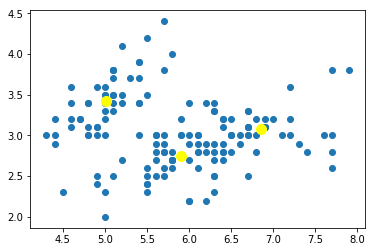

In [11]:
# Lets check the features on our clusters centroids

km.cluster_centers_

# We got centroids interms on Sepal.Length, Sepal.Width, Petal.Length, Petal.Width coordinates
# We can not visualize a 4-D chart(till we learn PCA). Thus we will take only two feature lets say sepal length and sepal width.

from matplotlib import pyplot as plt

plt.scatter(iris['Sepal.Length'], iris['Sepal.Width'])

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.show()

In [12]:
# Lets create a column in our data set setting the cluster

iris['Cluster'] = km.predict(iris.values)

iris.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Cluster
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [13]:
# Lets see how many rows in each cluster

iris.groupby(['Cluster']).size()

Cluster
0    50
1    62
2    38
dtype: int64

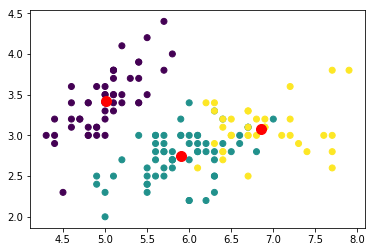

In [15]:
# Lets plot the sepal lenght and sepal width of each cluster

from matplotlib import pyplot as plt

plt.scatter(iris['Sepal.Length'], iris['Sepal.Width'], c= iris['Cluster'])

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.show()

How to find the optimum number of clusters: 

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.

If one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion".

In [18]:
# Find the optimal number of cluster using Elbow method

# Lets take the row data

df = data('iris')

# removing the lable column (Column of species)

df = df.drop(columns=['Species'])

In [21]:
# Finding the optimal number of clusters

from sklearn.cluster import KMeans

# Step 1: Create a empty object which will contain the cluter erros

cluster_error = []

# Create a function

for i in range(1, 11):
    
    # iterating from 1 to 11 cluster
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    
    # fitting each cluster
    kmeans.fit(df)
    
    # appending the error for each cluster
    
    cluster_error.append(kmeans.inertia_)
    
#cluster_error

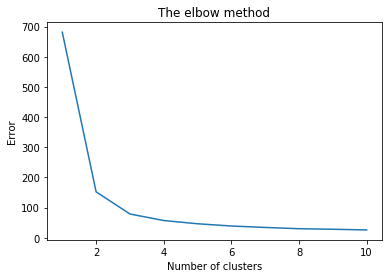

In [24]:
# Step 2: Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.plot(range(1, 11), cluster_error, marker = 'o')

plt.title('The elbow method')

plt.xlabel('Number of clusters')

plt.ylabel('Error') #within cluster sum of squares

plt.show()

Market basket analysis - Before carrying out MBA on the given dataset, we can study the given dataset, its attributes and summarize the dataset for a better understanding.

In [42]:
# Importing libraries
#!pip install mlxtend

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [43]:
# Importing data set

trans_part1 = pd.read_csv("E:\\Training data\\PGDS- EDA\\Batch 6\\instacart_2017_05_01\\order_products__part1.csv")
trans_part2 = pd.read_csv("E:\\Training data\\PGDS- EDA\\Batch 6\\instacart_2017_05_01\\order_products__part2.csv")
orderDf = pd.read_csv("E:\\Training data\\PGDS- EDA\\Batch 6\\instacart_2017_05_01\\orders.csv")
productDf = pd.read_csv("E:\\Training data\\PGDS- EDA\\Batch 6\\instacart_2017_05_01\\products.csv")

In [44]:
# we will merge the trans_part1 and trans_part2 dataset to get the complete order dataset.

trans_part2 = trans_part2.append(trans_part1,ignore_index = True)

trans_part2.shape

(33819106, 4)

In [ ]:
# PS1 - Number of customer the store have
# PS2 - Percent of customer placing more than 80 orders
# PS3 - Top 20 products
# PS4 - Which day of the week store have less rush.

In [56]:
# Lets explore the data a bit
# I am intersted to know distribution of number of orders per customer

# Calculating the number of orders per customer

customerNumOrderFrame = orderDf.groupby(['user_id'])["order_number"].size().reset_index()

# Number of customers with more than 80 orders

More_than_80_orders = customerNumOrderFrame[customerNumOrderFrame['order_number'] > 80]

More_than_80_orders.count()



user_id         2829
order_number    2829
dtype: int64

In [67]:
# Lets find the top frequently purchased products by counting the order_id for each product_id

productCountDf = trans_part2.groupby(["product_id"])["order_id"].count().reset_index()

#Here order_id is the count so we need to sort the data frame w.r.t order_id

productCountDf = productCountDf.sort_values(by = "order_id",ascending = False)

top_20 = productCountDf.head(20)

# To get the product name we can merge on product df

topProd_df = top_20.merge(productDf,on = "product_id")

display(topProd_df.loc[:,["product_name"]])


,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Whole Milk


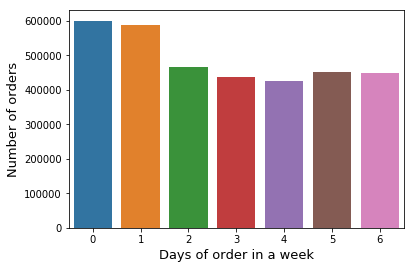

In [36]:
# Days of Orders in a week

grouped = orderDf.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

# Ploting

sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()